### Importing Statements

In [18]:
# Importing statements
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt

%matplotlib inline

### Loading Data

In [2]:
working_dir = "../datasets"
data_dir = os.path.join(working_dir, "processed_data")

In [3]:
# list of files in the data_dir
os.listdir(data_dir)

['input_notes.pkl',
 'output.pkl',
 'input.pkl',
 'output_notes.pkl',
 'pitchnames.csv']

In [4]:
# We have to load input file and output file.
with open(os.path.join(data_dir, 'input.pkl'),'rb') as f:
    X_seq_ = pickle.load(f)

with open(os.path.join(data_dir, 'output.pkl'),'rb') as f:
    y_seq_ = pickle.load(f)

In [5]:
# Printing the shape of the Data
X_seq_.shape, y_seq_.shape

((66925, 32, 1), (66925, 304))

In [6]:
# Normalize the Input
n_vocab = 304
X_seq = X_seq_/n_vocab
y_seq = y_seq_

### Splitting Data

In [7]:
X_train, X_test, y_train,y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=True, random_state=0)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((53540, 32, 1), (13385, 32, 1), (53540, 304), (13385, 304))

In [9]:
n_vocab = y_test.shape[1]

### Building second model

In [10]:
model = Sequential([
    LSTM(units=64, activation="relu", return_sequences=True, input_shape=(X_seq.shape[1], X_seq.shape[2])),
    BatchNormalization(),
    Dropout(0.2),
    
    LSTM(units=128, activation="relu", return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),
    
    LSTM(units=256, activation="relu"),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(64),
    Dense(128),
    
    Dense(n_vocab, activation="softmax")
    
])

In [11]:
# Printing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32, 64)            16896     
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 64)            256       
_________________________________________________________________
dropout (Dropout)            (None, 32, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32, 128)           98816     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 128)           512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               3

In [12]:
# Trying Different Loss
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [13]:
# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
419/419 [==============================] - 177s 423ms/step - loss: 4.9774 - val_loss: 4.9363
Epoch 2/10
419/419 [==============================] - 170s 405ms/step - loss: 4.7954 - val_loss: 4.9459
Epoch 3/10
419/419 [==============================] - 177s 422ms/step - loss: 4.7303 - val_loss: 4.9575
Epoch 4/10
419/419 [==============================] - 170s 406ms/step - loss: 4.6708 - val_loss: 4.8958
Epoch 5/10
419/419 [==============================] - 239s 570ms/step - loss: 4.5947 - val_loss: 4.8747
Epoch 6/10
419/419 [==============================] - 306s 731ms/step - loss: 4.5029 - val_loss: 4.8075
Epoch 7/10
419/419 [==============================] - 335s 799ms/step - loss: 4.4214 - val_loss: 4.6769
Epoch 8/10
419/419 [==============================] - 339s 808ms/step - loss: 4.3457 - val_loss: 4.6014
Epoch 9/10
419/419 [==============================] - 341s 814ms/step - loss: 4.2612 - val_loss: 4.4005
Epoch 10/10
419/419 [==============================] - 339s 809m

In [15]:
# serialize model to JSON
model_path = "../Models/trainedModels"
model_json = model.to_json()
with open(os.path.join(model_path, "lstmModel2.json"), "w") as json_file:
    json_file.write(model_json)

In [16]:
# serialize weights to HDF5
weight_path = "../Models/weights"
model.save_weights(os.path.join(weight_path, "lstmModel2.h5"))
print("Saved model to disk")

Saved model to disk


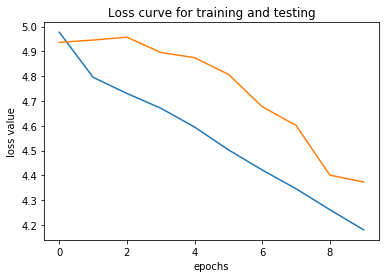

In [19]:
# Plotting the loss curve
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.title('Loss curve for training and testing')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])